In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

In [2]:
# Load CSV
df = pd.read_csv('allsides_balanced_news_headlines-texts.csv')
# Quick Look at Features
df.head()

,Unnamed: 0,title,tags,heading,source,text,bias_rating
0,0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left
1,1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center
2,2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right
3,3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right
4,4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left


In [3]:
# Remove Unnamed column
df = df.drop(['Unnamed: 0'],axis=1)

In [4]:
bias_counts = Counter(df['bias_rating'])

<BarContainer object of 3 artists>

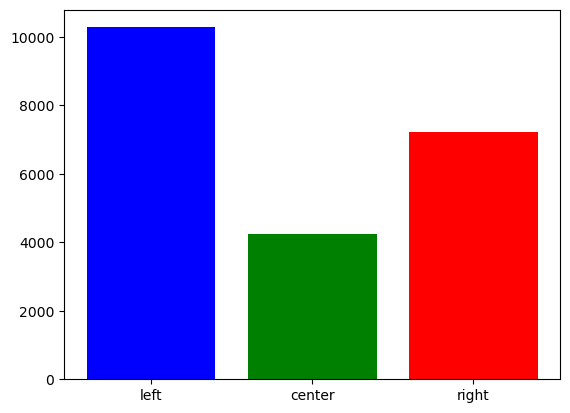

In [5]:
plt.bar(bias_counts.keys(), bias_counts.values(),color=['b','g','r'])

In [6]:
source_counts = Counter(df['source'])

In [7]:
# Count missing values per column
df.isnull().sum()

title          0
tags           0
heading        0
source         8
text           7
bias_rating    0
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

title          0
tags           0
heading        0
source         0
text           0
bias_rating    0
dtype: int64

In [10]:
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print("=================================================")
    print(df[col].value_counts())
    plt.show()

title
Swing State Polls                              6
French Election                                6
Obama on Hillary’s Emails                      6
July Jobs Report                               6
Gun Control Debate Continues                   6
                                              ..
Gay Marriage Debate                            2
Postal Service                                 2
Shadow Campaign of Hillary Clinton             2
SC House Approves Confederate Flag Removal     1
Putin Probably Approved Former Spy's Murder    1
Name: count, Length: 7263, dtype: int64
tags
['Presidential Elections', 'Elections']                                                                       1441
['Politics']                                                                                                   757
['White House', 'Politics']                                                                                    688
['Immigration']                                                  

In [11]:
df['text_length'] = df['text'].str.len()
df['text_word_count'] = df['text'].str.split().str.len()

In [12]:
df.head(10)

,title,tags,heading,source,text,bias_rating,text_length,text_word_count
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left,522,90
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center,554,90
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right,550,90
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right,542,92
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left,579,94
5,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen warns lawmakers U.S. Treasury to hit de...,Reuters,U.S. Treasury Secretary Janet Yellen on Tuesda...,center,537,90
6,Night 2: Christie on Hillary,"['Republican Party', 'Politics']",Washed-Up Chris Christie Rips Into Hillary Cli...,Daily Beast,"It was surely different from 2012.\nBack then,...",left,519,88
7,Night 2: Christie on Hillary,"['Republican Party', 'Politics']","Christie convicts Clinton, but was he 'guilty'...",Fox News (Online News),Chris Christie wasn’t the only one prosecuting...,right,173,27
8,Night 2: Christie on Hillary,"['Republican Party', 'Politics']",Anti-Clinton Republican National Convention Cr...,HuffPost,The crowd at the 2016 Republican National Conv...,left,281,44
9,Denying Abortion Medication Could Violate Civi...,"['Abortion', 'Pharmacies', 'Abortion Pills', '...",Biden admin to pharmacies: Refusing to fill co...,Politico,Senior Biden administration officials announce...,left,574,94


In [13]:
df['text_length'].describe()

count    21739.000000
mean       413.484015
std        177.406026
min          5.000000
25%        232.000000
50%        510.000000
75%        564.000000
max        821.000000
Name: text_length, dtype: float64

In [14]:
df['text_word_count'].describe()

count    21739.000000
mean        66.302774
std         28.366340
min          1.000000
25%         37.000000
50%         86.000000
75%         90.000000
max        125.000000
Name: text_word_count, dtype: float64

In [15]:
df['heading_length'] = df['heading'].str.len()
df['heading_word_count'] = df['heading'].str.split().str.len()

In [16]:
df['heading_length'].describe()

count    21739.000000
mean        67.334100
std         19.549055
min          8.000000
25%         55.000000
50%         66.000000
75%         79.000000
max        231.000000
Name: heading_length, dtype: float64

In [17]:
df['heading_word_count'].describe()

count    21739.000000
mean        10.563181
std          3.190071
min          2.000000
25%          8.000000
50%         10.000000
75%         12.000000
max         36.000000
Name: heading_word_count, dtype: float64

In [18]:
df['text'] = df['text'].str.replace(r'\s+', ' ', regex=True).str.strip()

In [19]:
df['text'].head(10)

0    As Yasmin Miller drove home from a laundromat ...
1    As many Chicagoans were celebrating the Fourth...
2    The nation’s 4th of July weekend was marred by...
3    Treasury Secretary Janet Yellen on Tuesday war...
4    Treasury Secretary Janet Yellen on Tuesday tol...
5    U.S. Treasury Secretary Janet Yellen on Tuesda...
6    It was surely different from 2012. Back then, ...
7    Chris Christie wasn’t the only one prosecuting...
8    The crowd at the 2016 Republican National Conv...
9    Senior Biden administration officials announce...
Name: text, dtype: object

In [20]:
df.head(5)

,title,tags,heading,source,text,bias_rating,text_length,text_word_count,heading_length,heading_word_count
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times (News),As Yasmin Miller drove home from a laundromat ...,left,522,90,71,10
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center,554,90,114,17
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post (News),The nation’s 4th of July weekend was marred by...,right,550,90,58,10
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right,542,92,99,17
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left,579,94,83,15


In [21]:
# Clean Up Source
df['source'] = df['source'].replace("\(([^\)]+)\)", "", regex=True)

<>:2: SyntaxWarning: invalid escape sequence '\('
<>:2: SyntaxWarning: invalid escape sequence '\('
C:\Users\tojoh\AppData\Local\Temp\ipykernel_14124\1810158692.py:2: SyntaxWarning: invalid escape sequence '\('
  df['source'] = df['source'].replace("\(([^\)]+)\)", "", regex=True)


In [22]:
# Verify Clean
sources = df['source'].unique()
print(sources)

['New York Times ' 'Chicago Tribune' 'New York Post ' 'The Epoch Times'
 'Washington Post' 'Reuters' 'Daily Beast' 'Fox News ' 'HuffPost'
 'Politico' 'CNBC' 'Washington Examiner' 'NBC News ' 'USA TODAY'
 'Townhall' 'CNN ' 'Daily Mail' 'Slate' 'The Hill' 'NPR '
 'Washington Times' 'Daily Kos' 'Raw Story' 'Forbes' 'MarketWatch'
 'Newsmax ' 'Military Times' 'Washington Free Beacon'
 'Wall Street Journal ' 'Bloomberg' 'The Guardian' 'BBC News'
 'Associated Press' 'ABC News ' 'Axios' 'CBS News ' 'Vox' 'Newsweek' 'CBN'
 'Breitbart News' 'Vice' 'Dan McLaughlin' 'Roll Call' 'The Daily Wire'
 'The Blaze' 'Guest Writer' 'Ruth Marcus' 'Guest Writer - Right'
 'CNN Business' 'Chicago Sun-Times' 'Michael Graham' 'Yahoo News'
 'Media Matters' 'Project Veritas' 'Defense One' 'The Post Millennial'
 'The Daily Caller' 'Mother Jones' 'Donald Trump' 'The Week - News'
 'Christian Science Monitor' 'National Review' 'Los Angeles Times'
 'The Atlantic' 'Poynter' 'Thomas Franck' 'Paul Krugman'
 'Andrew Stuttaf

In [23]:
df.head(10)

,title,tags,heading,source,text,bias_rating,text_length,text_word_count,heading_length,heading_word_count
0,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Chicago Gun Violence Spikes and Increasingly F...,New York Times,As Yasmin Miller drove home from a laundromat ...,left,522,90,71,10
1,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",‘Bullets just came from nowhere’: Fourth of Ju...,Chicago Tribune,As many Chicagoans were celebrating the Fourth...,center,554,90,114,17
2,Gun Violence Over Fourth of July Weekend,"['Protests', 'Fourth Of July', 'Gun Control An...",Dozens of shootings across US mark bloody July...,New York Post,The nation’s 4th of July weekend was marred by...,right,550,90,58,10
3,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Federal Government Will Run Out of Cash on Oct...,The Epoch Times,Treasury Secretary Janet Yellen on Tuesday war...,right,542,92,99,17
4,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen tells Congress that U.S. will run out o...,Washington Post,Treasury Secretary Janet Yellen on Tuesday tol...,left,579,94,83,15
5,Yellen Warns Congress of 'Economic Recession' ...,"['Janet Yellen', 'Debt Ceiling', 'Economic Pol...",Yellen warns lawmakers U.S. Treasury to hit de...,Reuters,U.S. Treasury Secretary Janet Yellen on Tuesda...,center,537,90,62,11
6,Night 2: Christie on Hillary,"['Republican Party', 'Politics']",Washed-Up Chris Christie Rips Into Hillary Cli...,Daily Beast,"It was surely different from 2012. Back then, ...",left,519,88,50,7
7,Night 2: Christie on Hillary,"['Republican Party', 'Politics']","Christie convicts Clinton, but was he 'guilty'...",Fox News,Chris Christie wasn’t the only one prosecuting...,right,173,27,64,11
8,Night 2: Christie on Hillary,"['Republican Party', 'Politics']",Anti-Clinton Republican National Convention Cr...,HuffPost,The crowd at the 2016 Republican National Conv...,left,281,44,70,9
9,Denying Abortion Medication Could Violate Civi...,"['Abortion', 'Pharmacies', 'Abortion Pills', '...",Biden admin to pharmacies: Refusing to fill co...,Politico,Senior Biden administration officials announce...,left,574,94,113,16


In [24]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, stratify=df['bias_rating'])


In [25]:
# Export
train.to_csv('Training.csv')
test.to_csv('Test.csv')